# Student Performance Prediction

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

# Data Extraction 

In [2]:
training1 = pd.read_csv('../input/student-performance-data-set-competition-form/X_train.csv')
training2 = pd.read_csv('../input/student-performance-data-set-competition-form/y_train.csv')

In [3]:
training1.shape

(678, 33)

In [4]:
training2.shape

(678, 2)

In [5]:
training1.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,...,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,...,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,yes,4,5,4,1,1,4,0,5,0


In [6]:
training2.head()

,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0


In [7]:
#union of data
join = (training1, training2['G3'])
df = pd.concat(join, axis = True)
df.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1714,GP,F,18,U,GT3,T,4,3,other,...,4,3,3,1,1,3,0,14,13,14
1,1254,GP,F,17,U,GT3,T,4,3,health,...,4,4,3,1,3,4,0,13,15,15
2,1639,GP,F,16,R,GT3,T,4,4,health,...,2,4,4,2,3,4,6,10,11,11
3,1118,GP,M,16,U,GT3,T,4,4,services,...,5,3,3,1,3,5,0,15,13,13
4,1499,GP,M,19,U,GT3,T,3,2,services,...,4,5,4,1,1,4,0,5,0,0


In [8]:
#indexing student ID
df = df.set_index('StudentID')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
StudentID,,,,,,,,,,,,,,,,,,,,,
1714,GP,F,18,U,GT3,T,4,3,other,other,...,4,3,3,1,1,3,0,14,13,14
1254,GP,F,17,U,GT3,T,4,3,health,other,...,4,4,3,1,3,4,0,13,15,15
1639,GP,F,16,R,GT3,T,4,4,health,teacher,...,2,4,4,2,3,4,6,10,11,11
1118,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,3,1,3,5,0,15,13,13
1499,GP,M,19,U,GT3,T,3,2,services,at_home,...,4,5,4,1,1,4,0,5,0,0


In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,678.000000,678.000000,678.000000,678.00000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.00000,678.000000,678.000000
mean,16.719764,2.607670,2.371681,1.50590,1.989676,0.261062,3.933628,3.233038,3.140118,1.480826,2.293510,3.522124,4.594395,11.20649,11.182891,11.308260
std,1.239881,1.134682,1.096750,0.73675,0.848082,0.664340,0.952346,1.042083,1.165537,0.895789,1.287705,1.431430,6.527236,2.90395,3.296146,3.833417
min,15.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.00000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.00000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.00000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.00000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.00000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.00000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.00000,19.000000,20.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 1714 to 1394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      678 non-null    object
 1   sex         678 non-null    object
 2   age         678 non-null    int64 
 3   address     678 non-null    object
 4   famsize     678 non-null    object
 5   Pstatus     678 non-null    object
 6   Medu        678 non-null    int64 
 7   Fedu        678 non-null    int64 
 8   Mjob        678 non-null    object
 9   Fjob        678 non-null    object
 10  reason      678 non-null    object
 11  guardian    678 non-null    object
 12  traveltime  678 non-null    int64 
 13  studytime   678 non-null    int64 
 14  failures    678 non-null    int64 
 15  schoolsup   678 non-null    object
 16  famsup      678 non-null    object
 17  paid        678 non-null    object
 18  activities  678 non-null    object
 19  nursery     678 non-null    object
 20  higher

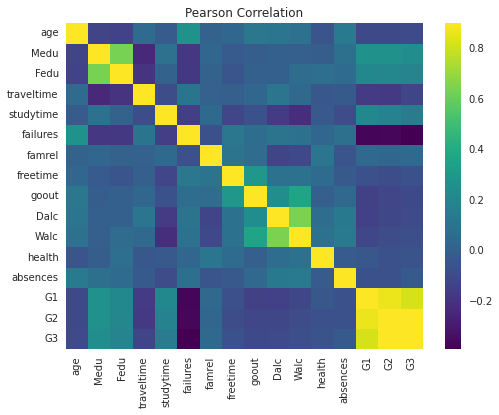

In [11]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), vmax = 0.9, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

# Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


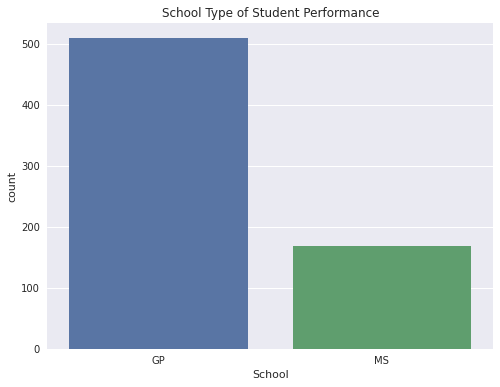

In [12]:
#visualize school type
plt.figure(figsize = (8,6))
sns.countplot(df['school'])
plt.title("School Type of Student Performance")
plt.xlabel("School")
plt.show()

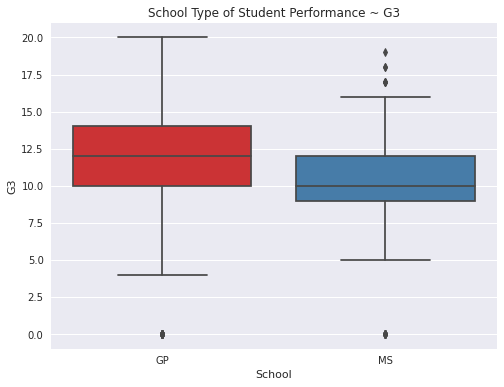

In [13]:
#visualize school type ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'school', y ='G3', palette = 'Set1')
plt.title("School Type of Student Performance ~ G3")
plt.xlabel("School")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


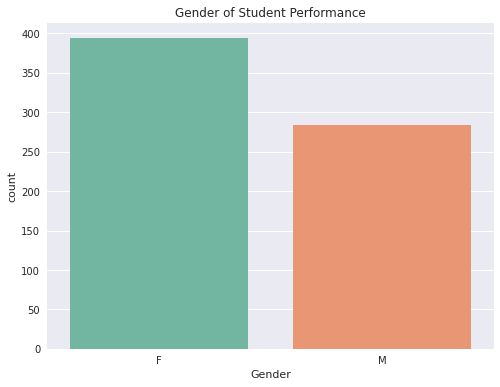

In [14]:
#visualize gender
plt.figure(figsize = (8,6))
sns.countplot(df['sex'], palette = 'Set2')
plt.title("Gender of Student Performance")
plt.xlabel("Gender")
plt.show()

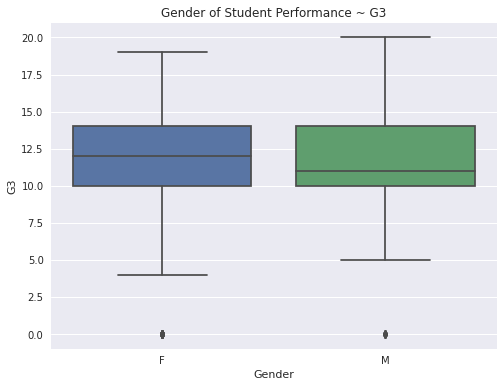

In [15]:
#visualize gender ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'sex', y ='G3')
plt.title("Gender of Student Performance ~ G3")
plt.xlabel("Gender")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


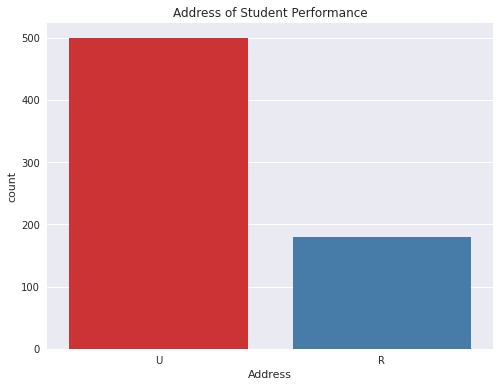

In [16]:
#visualize address
plt.figure(figsize = (8,6))
sns.countplot(df['address'], palette = 'Set1')
plt.title("Address of Student Performance")
plt.xlabel("Address")
plt.show()

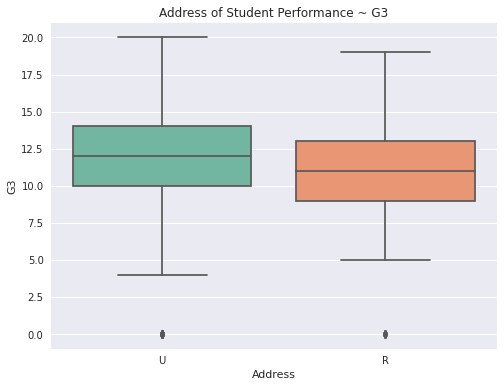

In [17]:
#visualize address ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'address', y ='G3', palette = 'Set2')
plt.title("Address of Student Performance ~ G3")
plt.xlabel("Address")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


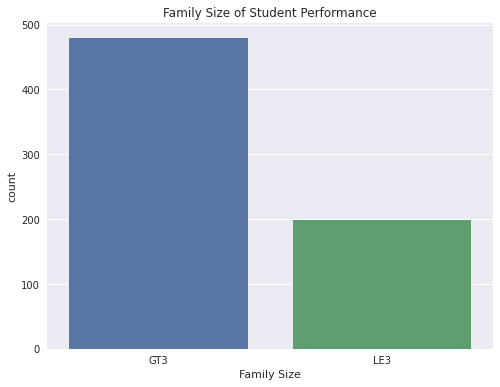

In [18]:
#visualize familly size
plt.figure(figsize = (8,6))
sns.countplot(df['famsize'])
plt.title("Family Size of Student Performance")
plt.xlabel("Family Size")
plt.show()

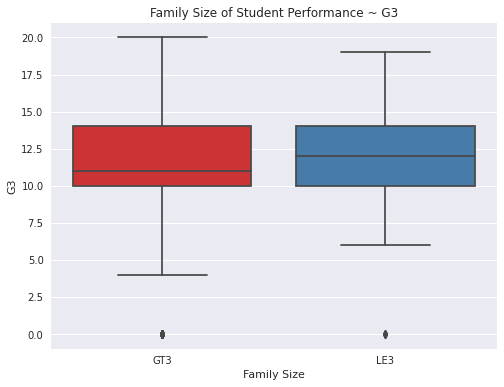

In [19]:
#visualize family size ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'famsize', y ='G3', palette = 'Set1')
plt.title("Family Size of Student Performance ~ G3")
plt.xlabel("Family Size")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


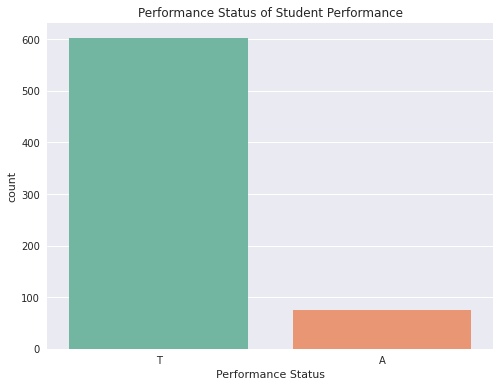

In [20]:
#visualize performance status
plt.figure(figsize = (8,6))
sns.countplot(df['Pstatus'], palette = 'Set2')
plt.title("Performance Status of Student Performance")
plt.xlabel("Performance Status")
plt.show()

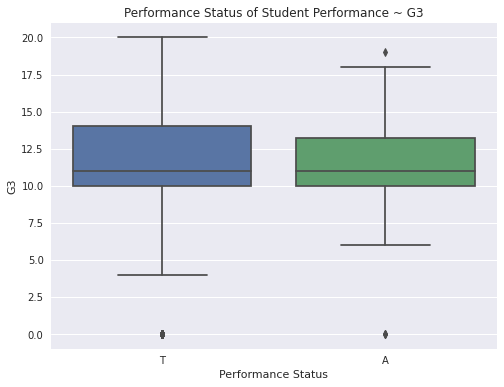

In [21]:
#visualize performance status ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Pstatus', y ='G3')
plt.title("Performance Status of Student Performance ~ G3")
plt.xlabel("Performance Status")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


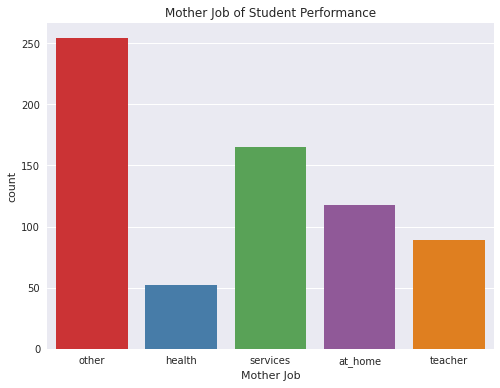

In [22]:
#visualize mother job
plt.figure(figsize = (8,6))
sns.countplot(df['Mjob'], palette = 'Set1')
plt.title("Mother Job of Student Performance")
plt.xlabel("Mother Job")
plt.show()

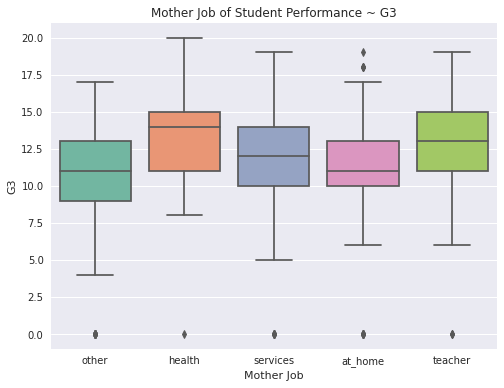

In [23]:
#visualize mother job ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Mjob', y ='G3', palette = 'Set2')
plt.title("Mother Job of Student Performance ~ G3")
plt.xlabel("Mother Job")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


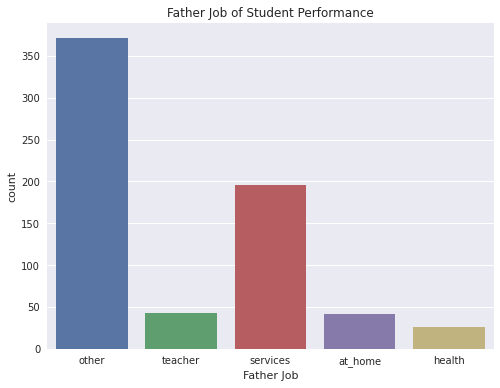

In [24]:
#visualize mother job
plt.figure(figsize = (8,6))
sns.countplot(df['Fjob'])
plt.title("Father Job of Student Performance")
plt.xlabel("Father Job")
plt.show()

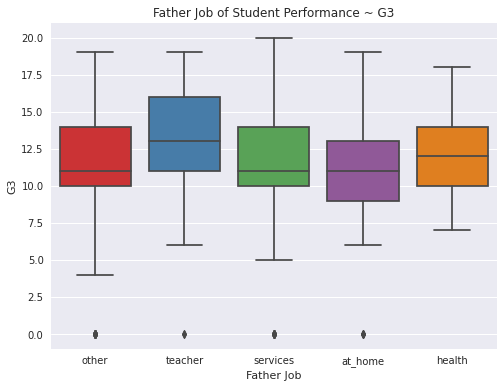

In [25]:
#visualize father job ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Fjob', y ='G3', palette = 'Set1')
plt.title("Father Job of Student Performance ~ G3")
plt.xlabel("Father Job")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


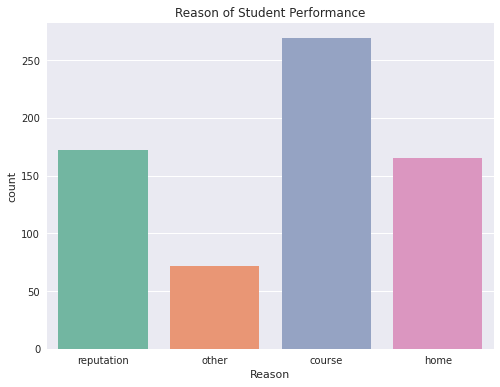

In [26]:
#visualize reason
plt.figure(figsize = (8,6))
sns.countplot(df['reason'], palette = 'Set2')
plt.title("Reason of Student Performance")
plt.xlabel("Reason")
plt.show()

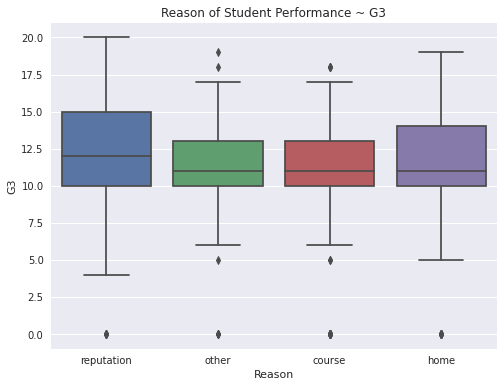

In [27]:
#visualize reason ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'reason', y ='G3')
plt.title("Reason of Student Performance ~ G3")
plt.xlabel("Reason")
plt.ylabel("G3")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


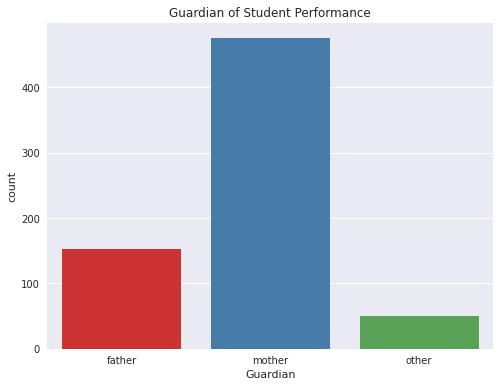

In [28]:
#visualize guardian
plt.figure(figsize = (8,6))
sns.countplot(df['guardian'], palette = 'Set1')
plt.title("Guardian of Student Performance")
plt.xlabel("Guardian")
plt.show()

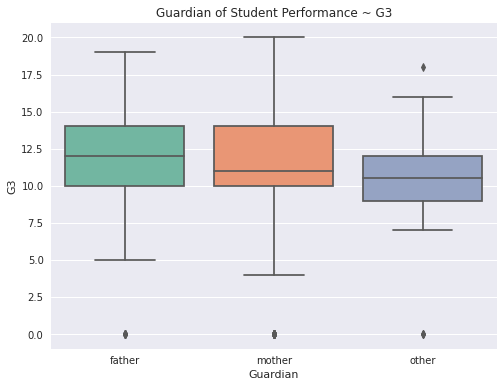

In [29]:
#visualize guardian ~ G3
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'guardian', y ='G3', palette = 'Set2')
plt.title("Guardian of Student Performance ~ G3")
plt.xlabel("Guardian")
plt.ylabel("G3")
plt.show()

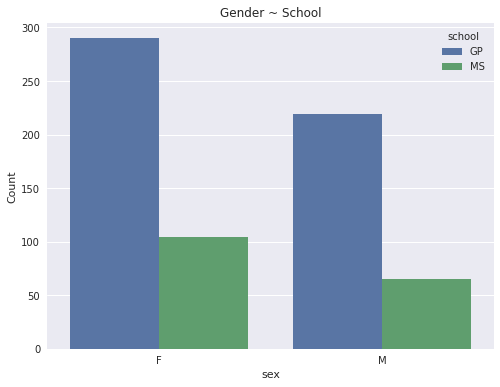

In [30]:
#group gender & school
gender_school = df.groupby(['sex', 'school']).size().reset_index(name = 'Count')

#visualize gender ~ school
plt.figure(figsize = (8,6))
sns.barplot(data = gender_school, x = 'sex', y = 'Count', hue = 'school')
plt.title("Gender ~ School")
plt.show()

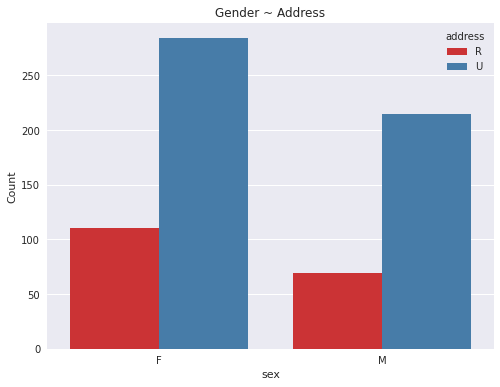

In [31]:
#group gender & address
gender_address = df.groupby(['sex', 'address']).size().reset_index(name = 'Count')

#visualize gender ~ address
plt.figure(figsize = (8,6))
sns.barplot(data = gender_address, x = 'sex', y = 'Count', hue = 'address', palette = 'Set1')
plt.title("Gender ~ Address")
plt.show()

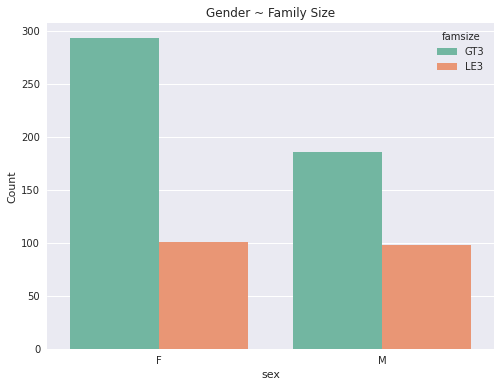

In [32]:
#group gender & family size
gender_family = df.groupby(['sex', 'famsize']).size().reset_index(name = 'Count')

#visualize gender ~ family size
plt.figure(figsize = (8,6))
sns.barplot(data = gender_family, x = 'sex', y = 'Count', hue = 'famsize', palette = 'Set2')
plt.title("Gender ~ Family Size")
plt.show()

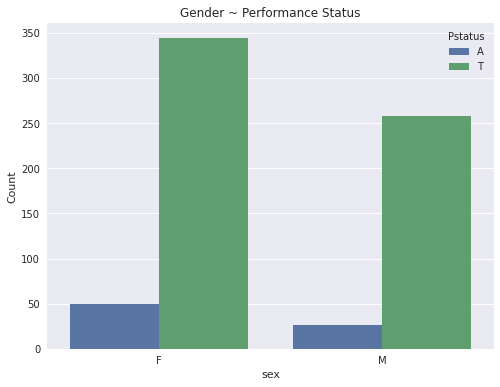

In [33]:
#group gender & performance status
gender_performance = df.groupby(['sex', 'Pstatus']).size().reset_index(name = 'Count')

#visualize gender ~ performance status
plt.figure(figsize = (8,6))
sns.barplot(data = gender_performance, x = 'sex', y = 'Count', hue = 'Pstatus')
plt.title("Gender ~ Performance Status")
plt.show()

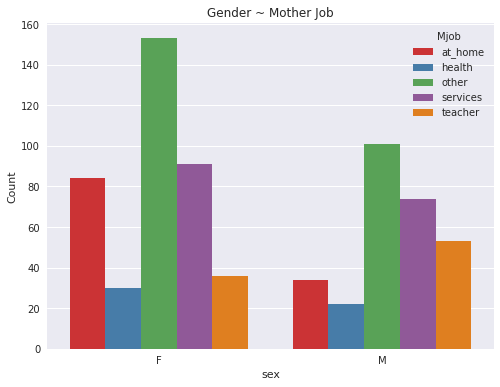

In [34]:
#group gender & mother job
gender_mother = df.groupby(['sex', 'Mjob']).size().reset_index(name = 'Count')

#visualize gender ~ mother job
plt.figure(figsize = (8,6))
sns.barplot(data = gender_mother, x = 'sex', y = 'Count', hue = 'Mjob', palette = 'Set1')
plt.title("Gender ~ Mother Job")
plt.show()

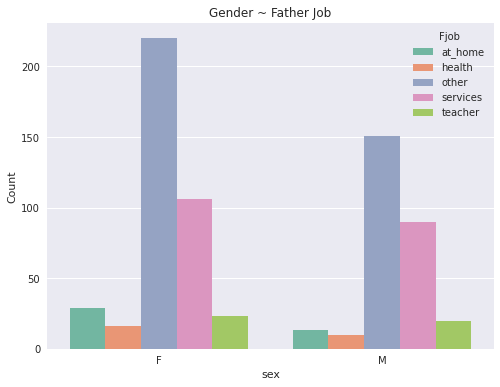

In [35]:
#group gender & father job
gender_father = df.groupby(['sex', 'Fjob']).size().reset_index(name = 'Count')

#visualize gender ~ father job
plt.figure(figsize = (8,6))
sns.barplot(data = gender_father, x = 'sex', y = 'Count', hue = 'Fjob', palette = 'Set2')
plt.title("Gender ~ Father Job")
plt.show()

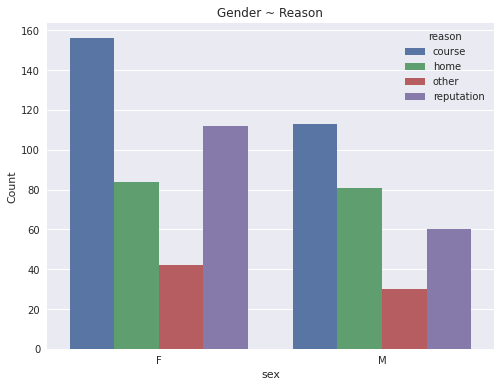

In [36]:
#group gender & reason
gender_reason = df.groupby(['sex', 'reason']).size().reset_index(name = 'Count')

#visualize gender ~ reason
plt.figure(figsize = (8,6))
sns.barplot(data = gender_reason, x = 'sex', y = 'Count', hue = 'reason')
plt.title("Gender ~ Reason")
plt.show()

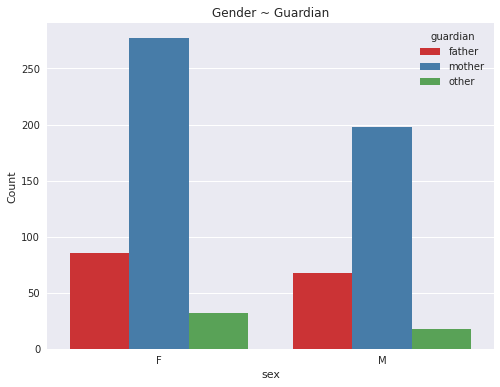

In [37]:
#group gender & guardian
gender_guardian = df.groupby(['sex', 'guardian']).size().reset_index(name = 'Count')

#visualize gender ~ guardian
plt.figure(figsize = (8,6))
sns.barplot(data = gender_guardian, x = 'sex', y = 'Count', hue = 'guardian', palette = 'Set1')
plt.title("Gender ~ Guardian")
plt.show()

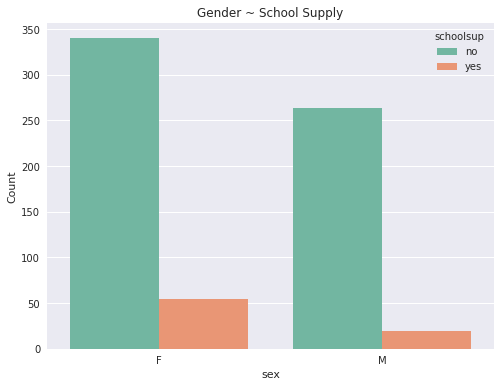

In [38]:
#group gender & school supply
gender_school = df.groupby(['sex', 'schoolsup']).size().reset_index(name = 'Count')

#visualize gender ~ school supply
plt.figure(figsize = (8,6))
sns.barplot(data = gender_school, x = 'sex', y = 'Count', hue = 'schoolsup', palette = 'Set2')
plt.title("Gender ~ School Supply")
plt.show()

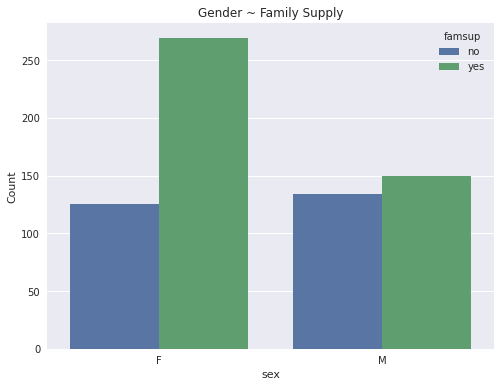

In [39]:
#group gender & family supply
gender_famliy = df.groupby(['sex', 'famsup']).size().reset_index(name = 'Count')

#visualize gender ~ family supply
plt.figure(figsize = (8,6))
sns.barplot(data = gender_famliy, x = 'sex', y = 'Count', hue = 'famsup')
plt.title("Gender ~ Family Supply")
plt.show()

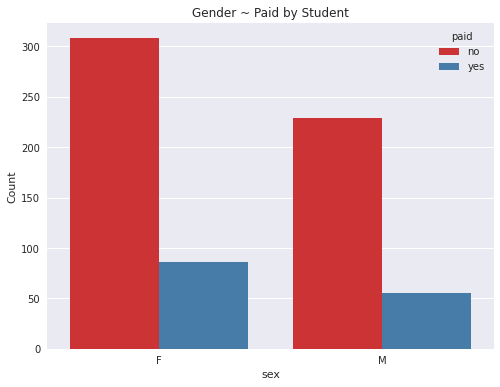

In [40]:
#group gender & paid by student
gender_paid = df.groupby(['sex', 'paid']).size().reset_index(name = 'Count')

#visualize gender ~ paid by student
plt.figure(figsize = (8,6))
sns.barplot(data = gender_paid, x = 'sex', y = 'Count', hue = 'paid', palette = 'Set1')
plt.title("Gender ~ Paid by Student")
plt.show()

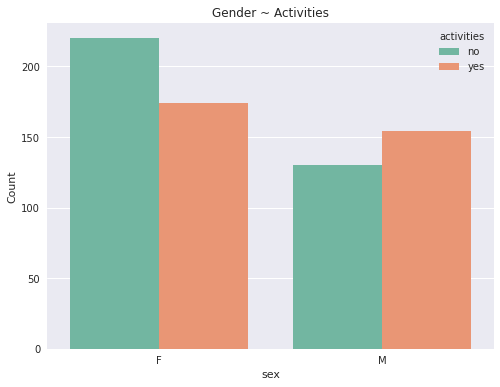

In [41]:
#group gender & activities
gender_activities = df.groupby(['sex', 'activities']).size().reset_index(name = 'Count')

#visualize gender ~ activities
plt.figure(figsize = (8,6))
sns.barplot(data = gender_activities, x = 'sex', y = 'Count', hue = 'activities', palette = 'Set2')
plt.title("Gender ~ Activities")
plt.show()

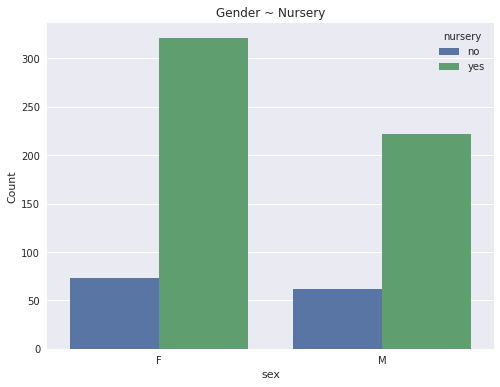

In [42]:
#group gender & nursery
gender_nursery = df.groupby(['sex', 'nursery']).size().reset_index(name = 'Count')

#visualize gender ~ nursery
plt.figure(figsize = (8,6))
sns.barplot(data = gender_nursery, x = 'sex', y = 'Count', hue = 'nursery')
plt.title("Gender ~ Nursery")
plt.show()

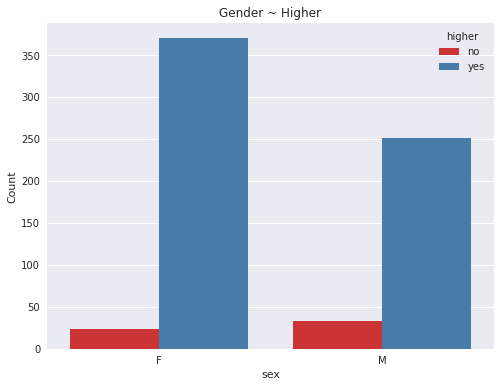

In [43]:
#group gender & higher
gender_higher = df.groupby(['sex', 'higher']).size().reset_index(name = 'Count')

#visualize gender ~ higher
plt.figure(figsize = (8,6))
sns.barplot(data = gender_higher, x = 'sex', y = 'Count', hue = 'higher', palette = 'Set1')
plt.title("Gender ~ Higher")
plt.show()

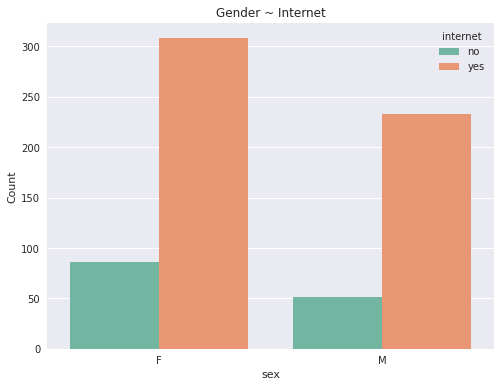

In [44]:
#group gender & internet
gender_internet = df.groupby(['sex', 'internet']).size().reset_index(name = 'Count')

#visualize gender ~ internet
plt.figure(figsize = (8,6))
sns.barplot(data = gender_internet, x = 'sex', y = 'Count', hue = 'internet', palette = 'Set2')
plt.title("Gender ~ Internet")
plt.show()

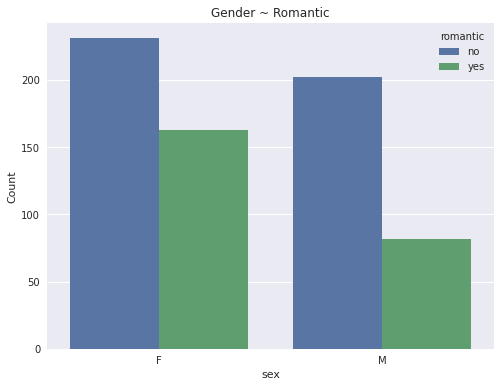

In [45]:
#group gender & romantic
gender_romantic = df.groupby(['sex', 'romantic']).size().reset_index(name = 'Count')

#visualize gender ~ romantic
plt.figure(figsize = (8,6))
sns.barplot(data = gender_romantic, x = 'sex', y = 'Count', hue = 'romantic')
plt.title("Gender ~ Romantic")
plt.show()

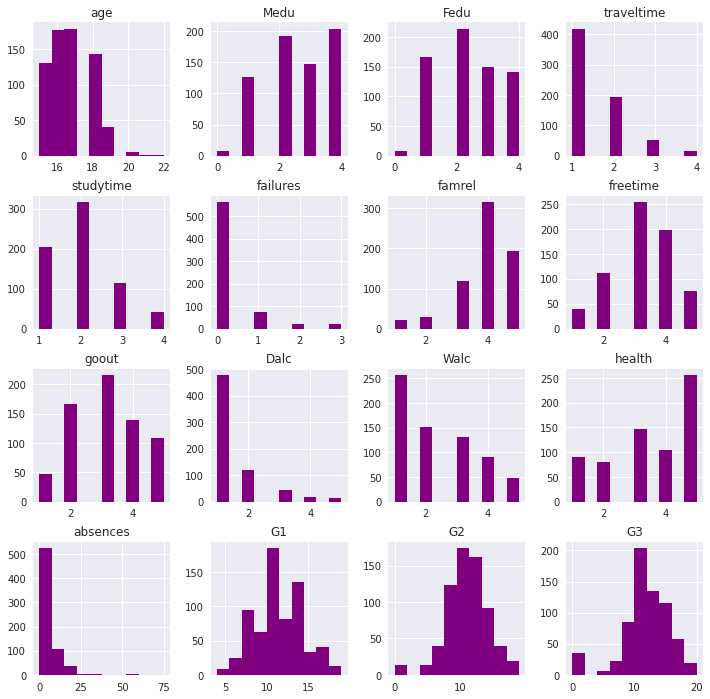

In [46]:
#visualize histogram of each attribute
df.hist(figsize = (12,12), color = 'purple')
plt.show()

# Regression Model

In [47]:
#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
StudentID,,,,,,,,,,,,,,,,,,,,,
1714,18,4,3,1,4,0,4,3,3,1,...,0,0,0,1,1,0,1,1,1,0
1254,17,4,3,1,3,0,4,4,3,1,...,1,0,0,1,1,1,1,1,1,1
1639,16,4,4,1,2,0,2,4,4,2,...,1,0,0,1,0,1,1,1,0,0
1118,16,4,4,1,3,0,5,3,3,1,...,1,0,0,1,0,1,1,1,1,0
1499,19,3,2,1,1,3,4,5,4,1,...,1,0,0,1,0,0,1,0,1,1


In [48]:
#split data 
X = df.drop('G3', axis = 1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(474, 41)
(474,)
(204, 41)
(204,)


In [49]:
#Linear Regression
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 9.66 ms, sys: 7.58 ms, total: 17.2 ms
Wall time: 16.2 ms


0.893261587148084

In [50]:
#Lasso Regression
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 5.91 ms, sys: 966 µs, total: 6.87 ms
Wall time: 7.1 ms


0.8884209579824383

## Linear Regression Model is the best accuracy score result on 89%

In [51]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[ 6.08427569e+00  1.14237471e+01  1.04657405e+01  1.62237173e+01
  1.16298983e+01  1.20397529e+01  1.21392502e+01  1.15445077e+01
  1.29997675e+01  1.30684796e+01  1.32563513e+01  8.34448007e+00
  1.42204217e+01  1.63687694e+01  1.16856424e+01  1.22963053e+01
  1.39632924e+01  9.46513810e+00  1.53345491e+01  1.32005395e+01
  1.29527950e+01  1.81740186e+01  1.63582309e+01  1.04088462e+01
  1.19216532e+01  9.78496509e+00  8.60833956e+00  1.70896001e+01
  1.44725477e+01  1.22353613e+01  1.21638090e+01  6.91638037e+00
  1.97214291e+01  9.14858179e+00  9.12690401e+00  1.26391657e+01
  1.02143567e+01  1.36630944e+01  1.30928976e+01  1.17129868e+01
  7.90517088e+00  7.79316101e+00  1.46316575e+01  8.06187811e+00
  1.36127726e+01  1.63758863e+01  1.08134054e+01  1.26607166e+01
  1.26889813e+01  1.48987111e+01  1.28512503e+01  1.29194462e+01
  1.42309369e+01  9.40920085e+00  1.45234083e+01  1.85879309e+01
  9.72489230e+00  1.22218178e+01  1.32547097e+01  1.81557776e+01
  8.19694276e+00  1.25921

In [52]:
#check MAE, MSE & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  0.84
Mean Squared Error :  1.66
Root Mean Squared Error :  0.916515138991168


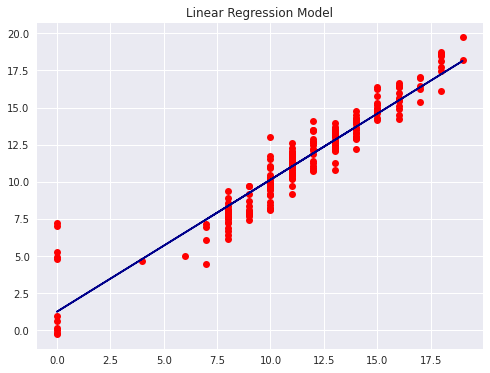

In [53]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


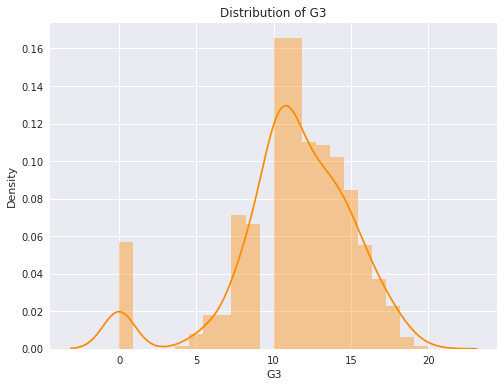

In [54]:
#distribution
plt.figure(figsize = (8,6))
sns.distplot(df['G3'], color = 'darkorange')
plt.title("Distribution of G3")
plt.show()

# Check Feature Importance

In [55]:
#defining feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

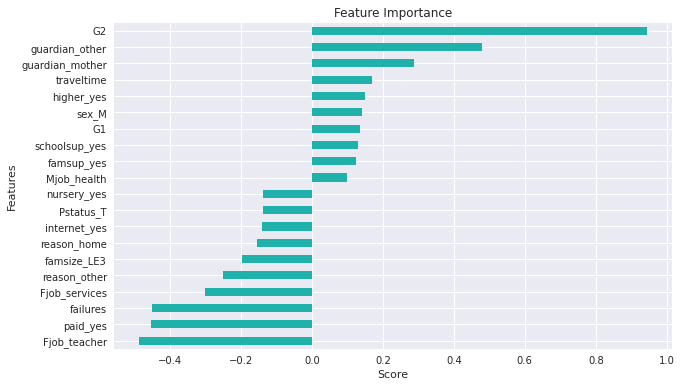

In [56]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'lightseagreen')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()